# Commented script to get stocks data

In [2]:
import pandas as pd
import quandl #quandl is not installed by default. You'll need to install it and get an account.
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
%pylab inline
quandl.ApiConfig.api_key = "cHs3hSC-ys83Msb8qXyh"#This is Jorge's key, get yourself a new one.

Populating the interactive namespace from numpy and matplotlib


<font color='blue'> It seems that the free data is only supported until 2018, so we need to check that</font>


In [3]:
start = datetime.datetime(2015,1,1) # Beginning of period 
end = datetime.datetime(2019,1,1) # End of period 

In [4]:
#You'll need to register on quandl.com to get a free account, otherwise you can only make up to 50 calls per day
stock = "TSLA" # some stock label we are interested in
data = quandl.get("WIKI/" + stock, start_date=start, end_date=end) #download data with quandl
data["30d"] = np.round(data["Close"].rolling(window = 30, center = False).mean(), 2) # 20 day moving average 
#apple

/Users/neutrino/Library/Python/3.7/lib/python/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


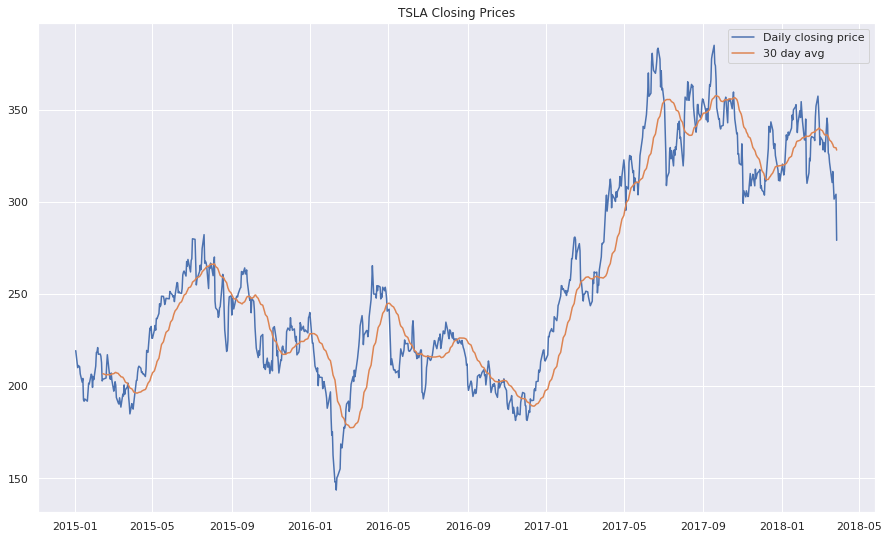

In [5]:
from pylab import *

pylab.rcParams['figure.figsize'] = (15, 9)
plt.title(stock + " Closing Prices")
plt.plot(data["Close"],label="Daily closing price") # plot daily closing prices 
plt.plot(data["30d"], label="30 day avg") # plot 20 day rolling average 
plt.legend()
plt.show()